# Capstone Project - Car accident severity

In [227]:
from IPython.core.display import display, HTML

## Introduction<br>

<font color=blue>**Background**</font><br>
Deaths and injuries by road crash are highly concerning issues, with 1.35 million and 50 million people affected around the world, respectively. 

In 2018, the United States, being one of the busiest countries with nearly 280 million vehicles in operation and more than 227.5 million people holding a valid driving license, counted more than 38,000 deaths and 12 million vehicles involved in road crashes. 

Road crashes are the leading cause of deaths in the U.S. for people aged 1-54. An additional 4.4 million are injured seriously enough to require medical attention. According to OECD’s 2019 U.S. annual report, the economic costs of traffic crashes represents 1.6% of the GDP. When quality of life valuations are considered, the total value of societal harm from motor vehicle crashes is nearly 6% of GDP.


<font color=blue>**Problem**</font><br>
In Seattle alone in 2018, the dataset provided by Seattle Department of Transportation (SDOT) counts over 3,500 injuries and 7,000 property-damage-only collisions in the same year. Thus, it is absolutely reasonable that various stakeholders would wish to minimize such numbers, and this project addresses the request to choose the suitable predictive model(s) of the possibility and severity of road crashes.

While potential stakeholders include:<br>
* Drivers, pedestrians, bicyclists, others using transportation services
* Transportation service providers
* Hospitals
* Government bodies, e.g. EMS, SPD, School Board, DoTransportation, DoHealth
* Other local and federal government bodies (policy-making side, social welfare-side, etc.)
* Insurers
* Corporations and employees
* Nonprofit organizations

In this project we will focus on finding the determining variables causing crashes and the most suitable predictive modeling for the responsible parties such as SDOT or SPD to be able to alert and/or educate drivers sufficiently to reduce the number of crashes and the severity of crashes.

### Data Description



We expect the output will involve two types of classifications: one with two labels (crash or no crash), another with multiple (severity of crash).<br>
<font color=green>The first dataset</font> to look at is Seattle SDOT Collisions Data that is available at [Kaggle](https://www.kaggle.com/jonleon/seattle-sdot-collisions-data) which contains more than 221,000 records of collisions over the period of 2004 - 2019.<br>
Dataset Summary can be seen [here](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf) and below.

In [4]:
#Read the dataset downloaded from Kaggle. Dataset has been downloaded from the website and uploaded here as below.
sdot = pd.read_csv('SDOT_Collisions.csv')

In [5]:
#Get the glimps
sdot.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,...,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,...,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


In [7]:
sdot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221266 entries, 0 to 221265
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                213797 non-null  float64
 1   Y                213797 non-null  float64
 2   OBJECTID         221266 non-null  int64  
 3   INCKEY           221266 non-null  int64  
 4   COLDETKEY        221266 non-null  int64  
 5   REPORTNO         221266 non-null  object 
 6   STATUS           221266 non-null  object 
 7   ADDRTYPE         217554 non-null  object 
 8   INTKEY           71823 non-null   float64
 9   LOCATION         216680 non-null  object 
 10  EXCEPTRSNCODE    100863 non-null  object 
 11  EXCEPTRSNDESC    11775 non-null   object 
 12  SEVERITYCODE     221265 non-null  object 
 13  SEVERITYDESC     221266 non-null  object 
 14  COLLISIONTYPE    194767 non-null  object 
 15  PERSONCOUNT      221266 non-null  int64  
 16  PEDCOUNT         221266 non-null  int6

In [75]:
#Frequency per Severity
sdot['SEVERITYDESC'].value_counts()

Property Damage Only Collision    137485
Injury Collision                   58698
Unknown                            21636
Serious Injury Collision            3098
Fatality Collision                   349
Name: SEVERITYDESC, dtype: int64

In [143]:
import datetime as dt
#Count by year

sdot['INCDATE'] = pd.to_datetime(sdot['INCDATE'])
sdot['year'] = sdot['INCDATE'].dt.year
sdot['year'].value_counts().sort_index()  

2003        1
2004    15457
2005    16016
2006    15794
2007    15082
2008    14139
2009    13275
2010    11958
2011    12416
2012    12732
2013    12757
2014    13212
2015    14260
2016    13955
2017    12477
2018    12198
2019    11204
2020     4333
Name: year, dtype: int64


This is a positive dataset.<br>
<br>
<font color=green>**Negative dataset</font>** (or lack there of)<br>
Here we face the challenge of <u>**not having**</u> the negative dataset, which is the data of crashes that did not happen. Fortunately, a [Senior Data Scientist at Esri](https://medium.com/geoai/using-machine-learning-to-predict-car-accident-risk-4d92c91a7d57) introduces a commonly used method for building up a negative sample set. Such negative dataset creation will be conducted in the following data preparation section.

> Note: Large research institutes may be able to develop an algorithm to train data without negative data [(reference)](https://www.riken.jp/en/news_pubs/research_news/pr/2018/20181126_2/index.html). Hopefully such algorithm will be available in a Python library soon.
  

<font color=green>**Other datasets**</font><br>
The positive crash dataset contains features such as weather, road conditions, light conditions, and even whether or not the driver was “under the influence.” We will go through such datasets as follows to evaluate their significance in causing crashes:<br>
* Geospatal data available at [ArcGIS](https://developers.arcgis.com/search?q=seattle&p=api-python)
* Weather data available at [NOAA](https://search.usa.gov/search?utf8=%E2%9C%93&affiliate=ncdc&query=seattle)


As seen in the quick view below, however, according the SDOT crash data set, the majority of the crashes occurred when the road is dry, in daylight, and under no influence of drug or alcohol. Thus, <font color=green><u>further consideration</u></font> for data that represents relatively more human factors and personal attributes, e.g. driving skill, age, level of fatigue, mood, etc. will be followed.


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Quick view on SDOT positive data - Road / Light Condition

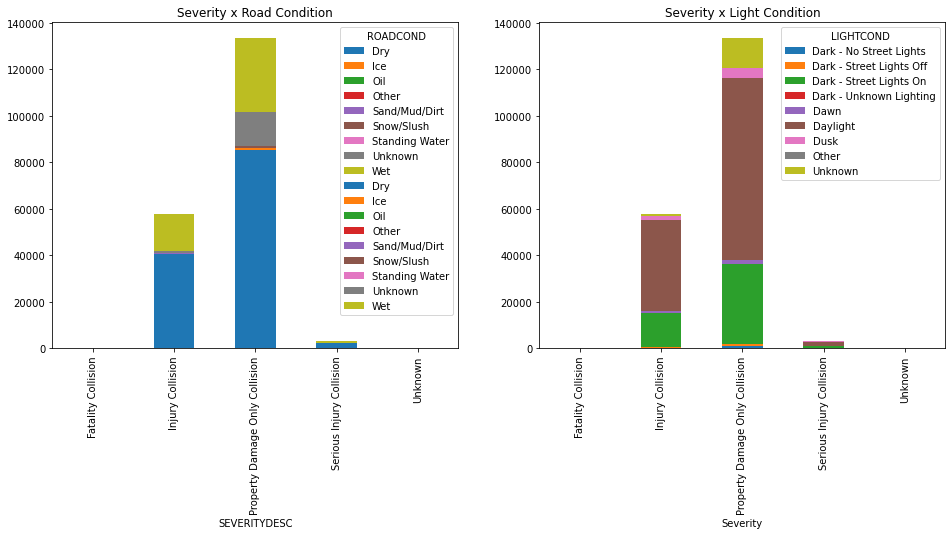

In [214]:
from matplotlib import gridspec

fig = plt.figure()
p1 = (sdot.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))
p2 = (sdot.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

p1.plot(kind='bar', figsize=(10,6), ax=ax0, stacked=True)
ax0.set_title('Severity x Road Condition')
ax0.set_xlabel('Severity')

p2.plot(kind='bar', figsize=(16,6), ax=ax1, stacked=True)
p1.plot(kind='bar', figsize=(16,6), ax=ax0, stacked=True)
ax1.set_title('Severity x Light Condition')
ax1.set_xlabel('Severity')

plt.show()

In [220]:
#That with Property-only and Unknown excluded

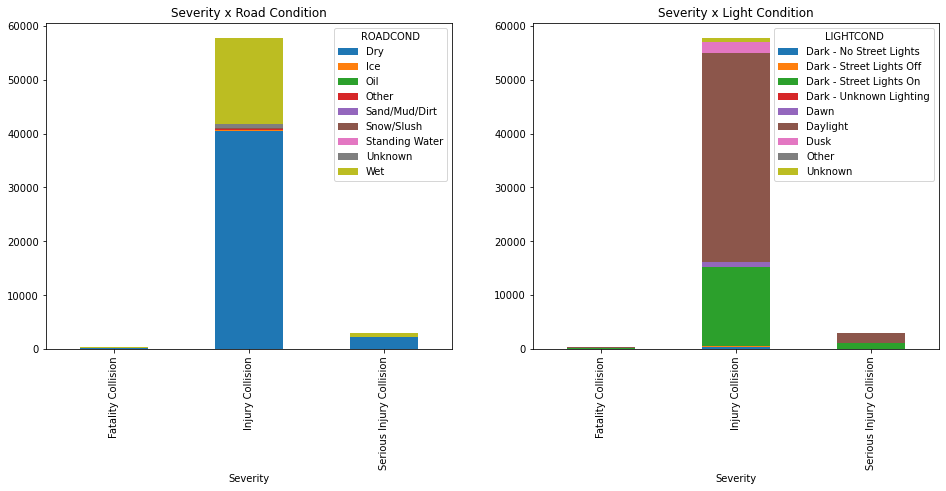

In [221]:

sdot_f = sdot.loc[sdot['SEVERITYDESC'].isin(['Fatality Collision','Injury Collision','Serious Injury Collision'])]

fig = plt.figure()
pf1 = (sdot_f.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))
pf2 = (sdot_f.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

pf1.plot(kind='bar', figsize=(10,6), ax=ax0, stacked=True)
ax0.set_title('Severity x Road Condition')
ax0.set_xlabel('Severity')

pf2.plot(kind='bar', figsize=(16,6), ax=ax1, stacked=True)
ax1.set_title('Severity x Light Condition')
ax1.set_xlabel('Severity')

plt.show()


In [222]:
sdot.groupby(['SEVERITYDESC'])['WEATHER'].value_counts() 

SEVERITYDESC                    WEATHER                 
Fatality Collision              Clear                         227
                                Overcast                       53
                                Raining                        50
                                Fog/Smog/Smoke                  3
                                Other                           3
                                Severe Crosswind                1
                                Unknown                         1
Injury Collision                Clear                       36189
                                Raining                     11278
                                Overcast                     8835
                                Unknown                       816
                                Fog/Smog/Smoke                188
                                Snowing                       171
                                Other                         120
                   

In [223]:
sdot.groupby(['SEVERITYDESC'])['ROADCOND'].value_counts() 

SEVERITYDESC                    ROADCOND      
Fatality Collision              Dry                 267
                                Wet                  69
                                Ice                   1
                                Unknown               1
Injury Collision                Dry               40464
                                Wet               15897
                                Unknown             755
                                Ice                 275
                                Snow/Slush          167
                                Other                43
                                Standing Water       30
                                Oil                  24
                                Sand/Mud/Dirt        23
Property Damage Only Collision  Dry               85214
                                Wet               31989
                                Unknown           14345
                                Ice                 937
 

In [224]:
sdot.groupby(['SEVERITYDESC'])['LIGHTCOND'].value_counts()

SEVERITYDESC                    LIGHTCOND               
Fatality Collision              Daylight                      168
                                Dark - Street Lights On       145
                                Dusk                           14
                                Dawn                            5
                                Dark - Street Lights Off        4
                                Dark - No Street Lights         1
                                Unknown                         1
Injury Collision                Daylight                    38919
                                Dark - Street Lights On     14605
                                Dusk                         1960
                                Dawn                          837
                                Unknown                       609
                                Dark - No Street Lights       338
                                Dark - Street Lights Off      316
                   

In [225]:
sdot.groupby(['SEVERITYDESC'])['UNDERINFL'].value_counts() 

SEVERITYDESC                    UNDERINFL
Fatality Collision              N              146
                                0               99
                                1               51
                                Y               42
Injury Collision                N            31446
                                0            22701
                                Y             1939
                                1             1623
Property Damage Only Collision  N            70438
                                0            57691
                                Y             3190
                                1             2372
Serious Injury Collision        N             1450
                                0             1185
                                Y              228
                                1              184
Unknown                         N                2
Name: UNDERINFL, dtype: int64

In [226]:
#breakdown in 2018
s2018 = sdot.loc[sdot['year']==2018]
s2018['SEVERITYDESC'].value_counts()

Property Damage Only Collision    7062
Injury Collision                  3358
Unknown                           1591
Serious Injury Collision           173
Fatality Collision                  14
Name: SEVERITYDESC, dtype: int64

##### EOD for Week 1 assignment